# A 100 neuron network with cubic shape

In [1]:
import os
network_path = "/home/zmd/Snudda/network"

## 1. Analyse network connectivity

In [8]:
import os
from snudda.analyse import SnuddaAnalyse

network_file = os.path.join(network_path ,"network-putative-synapses-MERGED.hdf5")
dist3D = False
y_max_H = None

sa = SnuddaAnalyse(network_file)

Assuming volume type: cube[cube or full]
Only using 20000neurons of the connection data
Loading 101 neurons with 138121 synapses and 64 gap junctions
Number of neurons: 101
Synapse row 0 - 0.0 % time: 0.014087178744375706 seconds
Created connection matrix 0.12377869011834264 seconds
GJ row : 0 - 0.0 %  time : 0.00035955989733338356 seconds
Created gap junction connection matrix 0.0005720607005059719 seconds
Creating population dictionary
Done.
!!! Setting sideLen to None
Calculating synapse distance histogram
Creating dist histogram
nSynapses = 138121, at 0
Created distance histogram (optimised) in 0.22647097008302808 seconds
Saving cache to /home/zmd/Snudda/network/network-putative-synapses-MERGED.hdf5-cache


This plots a histogram showing how many iSPN neurons connect to each dSPN neuron.

Calculating number of incoming connections iSPN -> dSPN
Centering in Striatum : Keeping 48/48
#pre = 48, #post = 48


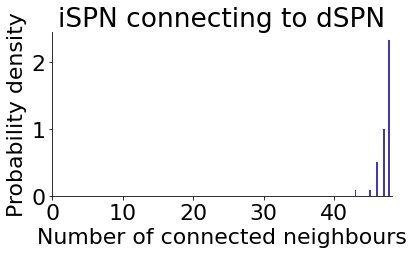

Wrote /home/zmd/Snudda/network/figures/Network-synapses-input-to-dSPN-from-iSPN.pdf


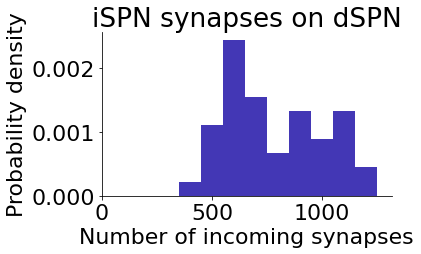

Wrote /home/zmd/Snudda/network/figures/Network-synapses-to-dSPN-from-iSPN.pdf


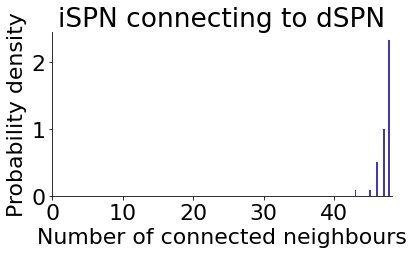

In [9]:
sa.plot_incoming_connections(neuron_type="dSPN", pre_type="iSPN", num_bins=20)

Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [2050.]
Rejected (too large z-depth): 254
P(d<5e-05)=0.9975165562913907
P(d<0.0001)=0.989247311827957
/home/zmd/Snudda/snudda/analyse/analyse.py:1419: RuntimeWarning: invalid value encountered in true_divide
  p_con = np.divide(count_con, count_all)


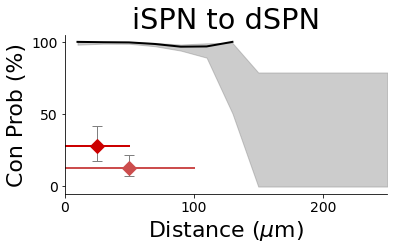

Wrote /home/zmd/Snudda/network/figures/Network-distance-dependent-connection-probability-iSPN-to-dSPN-synapses-2D-dist.pdf


In [10]:
sa.plot_connection_probability("iSPN", "dSPN",
                                dist_3d=dist3D,
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data=[13 / 47.0, 10 / 80.0],
                                exp_data_detailed=[(13, 47), (10, 80)],
                                y_max=y_max_H)

In [ ]:
Here we plot a histogram over the number of synapses between each pair of connected iSPN and dSPN.

Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in Striatum : Keeping 48/48
Calculating max synapses
Calculating mean synapses
Plotting 2272 connections


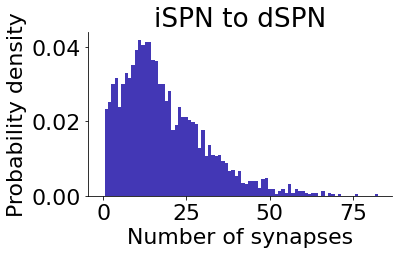

Wrote /home/zmd/Snudda/network/figures/Network-number-of-synapses-from-iSPN-to-dSPN-per-cell.pdf


In [11]:
sa.plot_num_synapses_per_pair("iSPN", "dSPN")

## 2. Creating input for the network

In [5]:

import os
from snudda.input import SnuddaInput
si = SnuddaInput(network_path=network_path, 
                 input_config_file=os.path.join("/home/zmd/Snudda/snudda/data/input_config","1w_input_test_.json"),
                 verbose=False)
si.position_file = os.path.join(network_path, "network-neuron-positions.hdf5")
si.network_config_file = os.path.join(network_path, "network-config.json")
#print(si.network_config_file)
si.generate()

Writing spikes to /home/zmd/Snudda/network/input-spikes.hdf5


In [14]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file)

Loading 50 neurons with 2161 synapses and 0 gap junctions


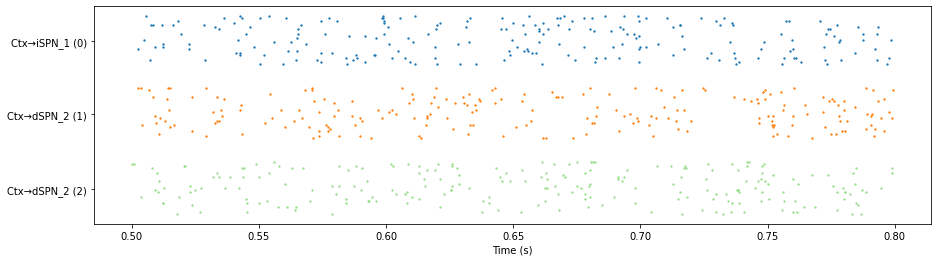

In [15]:
spi.plot_input("dSPN", 4, fig_size=(15,5))
spi.plot_input("iSPN", 4, fig_size=(15,5))
spi.plot_input("FSN", 4, fig_size=(15,4))
#spi.plot_input_to_target([0,1,2,50], fig_size=(15,4))   # plot specific neurons
spi.input_data.close()

## 3. Plot simulation result

In [3]:
import os
network_file = os.path.join(network_path, "network-putative-synapses-MERGED.hdf5")
volt_file_name = os.path.join(network_path, "simulation", "volt.txt")

from snudda.plotting import PlotTraces
pt = PlotTraces(volt_file_name, network_file=network_file)

Unable to guess ID, using 666.
Loading 101 neurons with 138121 synapses and 64 gap junctions


Plotting traces: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
Plotted 31 traces (total 101)
Saving to figure Network-spikes-666-FSN-iSPN-dSPN-colour.pdf


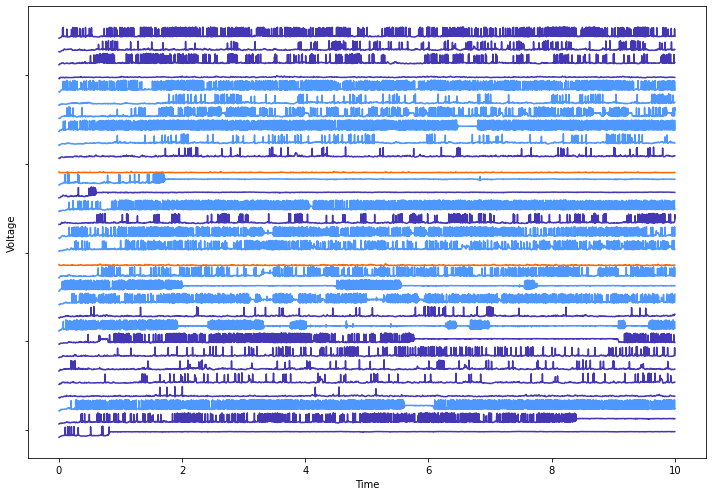

<Figure size 432x288 with 0 Axes>

In [9]:
pt.plot_traces([i for i in range(15,46)], figsize=(10,7))

Loading 101 neurons with 138121 synapses and 64 gap junctions
Sort the traces
Sort the traces
Saving /home/zmd/Snudda/network/figures/network-output-spikes-666-8-5-10000ms-RoundRobin-colour.pdf


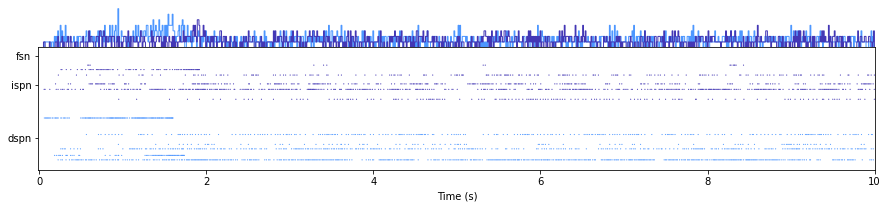

<Figure size 432x288 with 0 Axes>

In [7]:
import os
network_file = os.path.join(network_path, "network-putative-synapses-MERGED.hdf5")
spike_file_name = os.path.join(network_path, "simulation", "network-output-spikes-666-8-5-10000ms-RoundRobin.txt")
from snudda.plotting import PlotSpikeRaster
end_time = 10
type_order = ["dspn",  "ispn", "fsn"]

spsr = PlotSpikeRaster(spike_file_name, network_file, skip_time=0,
                                     end_time=end_time,
                                     type_order=type_order, figsize=(15,3))

## 4. Tune the input for the network

In [13]:
import os
from snudda.input.input_tuning import InputTuning
input_tuning = InputTuning(network_path)

In [14]:
neurons_path = os.path.join("/home/zmd/Snudda/snudda/data", "neurons", "striatum")
input_tuning.setup_network(neurons_path=neurons_path, 
                           num_replicas=5,
                           neuron_types="fs")
input_tuning.setup_input(input_type="cortical",  # eg. "cortical" or "thalamic"
                         num_input_min=100,
                         num_input_max=1000,
                         input_duration=2.0,
                         input_frequency_range=[1.0, 2.0, 3.0])


Skipping neuron type lts
Skipping neuron type ispn
Skipping neuron type chin
Skipping neuron type dspn
Found 4 neurons in /home/zmd/Snudda/snudda/data/neurons/striatum/fs
Writing network config file to /home/zmd/Snudda/network/network-config.json
No d_view specified, running distribute neurons in serial
No connections specified in connectivity_distribution.
No output file created, no synapses exist?
Creating symbolic link to MERGE file instead
/home/zmd/Snudda/network/network-synapses.hdf5 -> /home/zmd/Snudda/network/network-putative-synapses-MERGED.hdf5
Using cortical synapse density for input.
Loading 20 neurons with 0 synapses and 0 gap junctions
Writing spikes to /home/zmd/Snudda/network/input.hdf5


In [10]:
from snudda.input import SnuddaInput

si = SnuddaInput(input_config_file=input_tuning.input_config_file,
                 hdf5_network_file=input_tuning.network_file,
                 spike_data_filename=input_tuning.input_spikes_file,
                 time=input_tuning.max_time)
si.generate()

Writing spikes to /home/zmd/Snudda/network/input.hdf5


In [15]:
input_tuning.simulate()

Loading 20 neurons with 0 synapses and 0 gap junctions
NEURON: gid=0 already exists on this process as an output port
 near line 0
 {create axon[2]}
                 ^
        ParallelContext[4].set_gid2node(0, 0)


RuntimeError: hocobj_call error

In [ ]:
input_tuning.analyse_results(show_plots=True)